# arXiv Monthly Submissions & Downloads: Part 2

In [1]:
# Imports
import time_series as ts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from beakerx import *
from warnings import filterwarnings

# Settings
sns.set(context='notebook', style='whitegrid', palette='deep', rc=None)
filterwarnings('ignore')

In [2]:
# Data
df = pd.read_csv('combined_submissions_and_downloads.csv')
rows, columns = df.shape
f'Rows: {rows}, Columns: {columns}'

'Rows: 295, Columns: 4'

In [3]:
# Changing month to 'datetime'
ts.convert_to_datetime(data=df, column='month')

In [4]:
# Time series
downloads = ts.create_series(data=df, time_column='month', category_column='downloads')
submissions = ts.create_series(data=df, time_column='month', category_column='submissions')

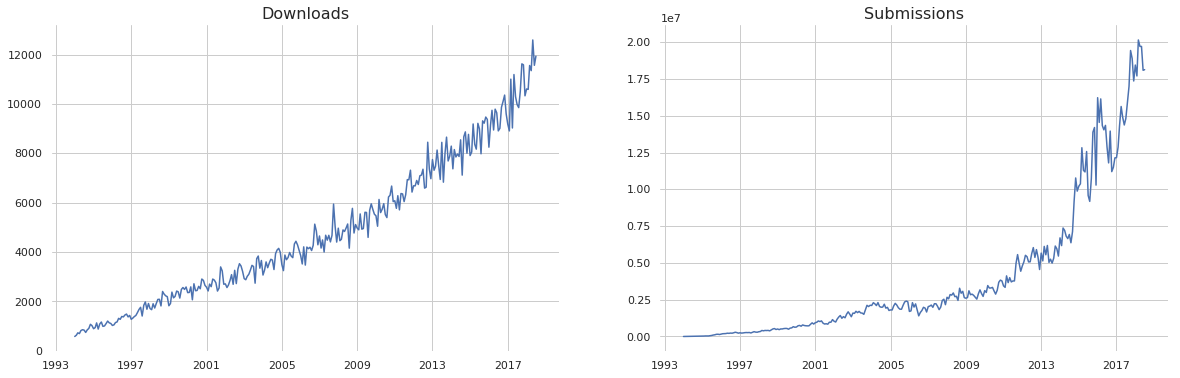

In [5]:
# Plotting
def plot_time_series(data_1, data_2, title_1, title_2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    ax1.set_title(title_1, fontsize=16), ax2.set_title(title_2, fontsize=16)
    ax1.spines['top'].set_visible(False), ax2.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False), ax2.spines['bottom'].set_visible(False)
    ax1.spines['right'].set_visible(False), ax2.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False), ax2.spines['left'].set_visible(False)
    sns.lineplot(data=data_1, ax=ax1)
    sns.lineplot(data=data_2, ax=ax2)
    
plot_time_series(submissions, downloads, 'Downloads', 'Submissions')

In [6]:
plot1 = TimePlot(title='Submissions', yLabel='Frequency')
plot1.add(Line(submissions))

In [7]:
plot2 = TimePlot(title='Downloads', yLabel='Frequency')
plot2.add(Line(downloads))

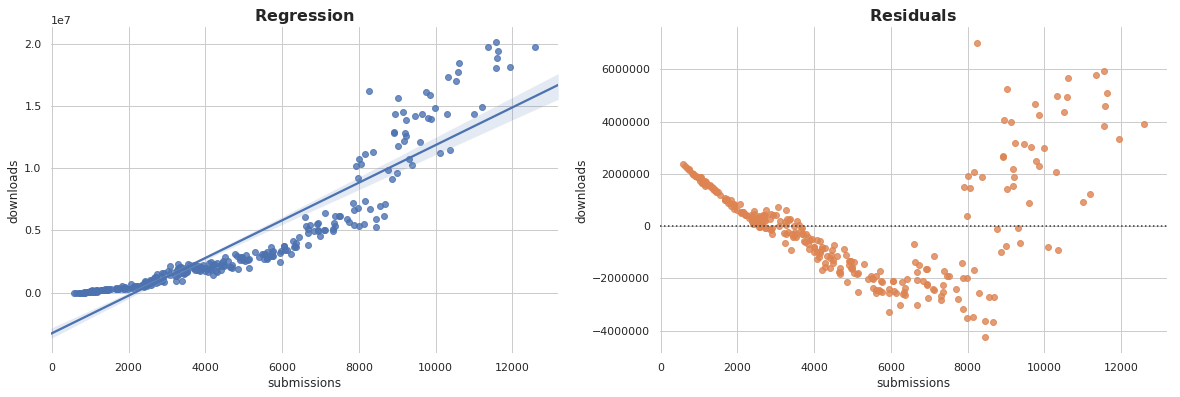

In [8]:
# Correlation
def plot_correlation(data_1, data_2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    ax1.set_title(r'$\bf{Regression}$', fontsize=16)
    ax2.set_title(r'$\bf{Residuals}$', fontsize=16)
    ax1.spines['top'].set_visible(False), ax2.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False), ax2.spines['bottom'].set_visible(False)
    ax1.spines['right'].set_visible(False), ax2.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False), ax2.spines['left'].set_visible(False)
    sns.regplot(x=data_1, y=data_2, ax=ax1)
    sns.residplot(x=data_1, y=data_2, ax=ax2)

plot_correlation(submissions, downloads)

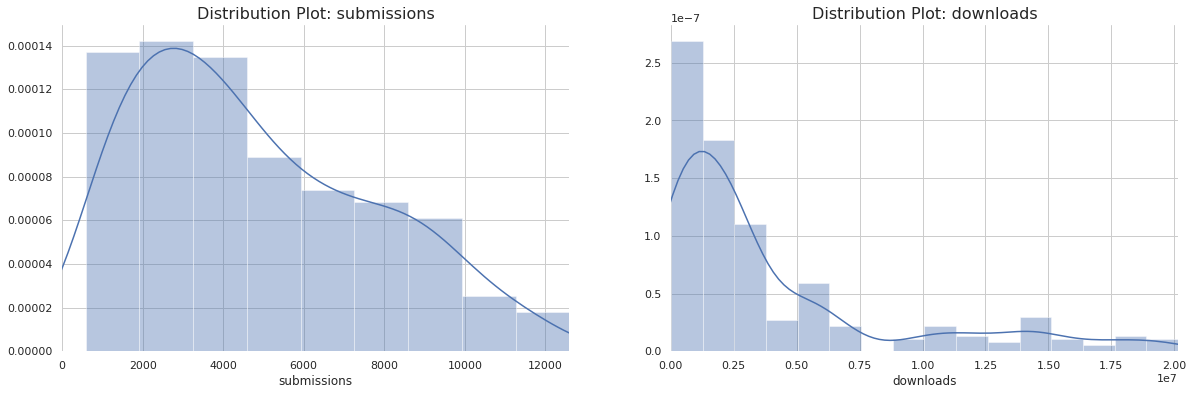

In [9]:
# Distribution
def plot_distribution(data_1, data_2=None):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    ax1.set_title(f'Distribution Plot: {data_1.name}', fontsize=16)
    ax2.set_title(f'Distribution Plot: {data_2.name}', fontsize=16)
    ax1.spines['top'].set_visible(False), ax2.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False), ax2.spines['bottom'].set_visible(False)
    ax1.spines['right'].set_visible(False), ax2.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False), ax2.spines['left'].set_visible(False)
    ax1.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True, labelleft=True, left=False, right=False)
    ax2.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True, labelleft=True, left=False, right=False)
    ax1.set_xlim(0, data_1.max()), ax2.set_xlim(0, data_2.max())
    sns.distplot(data_1, ax=ax1)
    sns.distplot(data_2, ax=ax2)

plot_distribution(submissions, downloads)